In [ ]:
#import libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings

# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

RAV = '/content/drive/My Drive/Rav'
CREMA = '/content/drive/My Drive/Crema'

Mounted at /content/drive


DATA PREPROCESSING

In [ ]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
path = []
for i in dir_list:
    Rav = '/content/drive/My Drive/Rav/' + i
    fname = os.listdir(Rav)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        path.append(Rav + '/' + f)

emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(path, columns=['Path'])
Rav_df = pd.concat([emotion_df, path_df], axis=1)
Rav_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)
print(Rav_df.head())
print("______________________________________________")
print(Rav_df.tail())
print("_______________________________________________")
print(Rav_df.Emotions.value_counts())


  Emotions                                               Path
0  neutral  /content/drive/My Drive/Rav/Actor_01/03-01-01-...
1  neutral  /content/drive/My Drive/Rav/Actor_01/03-01-02-...
2    happy  /content/drive/My Drive/Rav/Actor_01/03-01-03-...
3  neutral  /content/drive/My Drive/Rav/Actor_01/03-01-02-...
4  neutral  /content/drive/My Drive/Rav/Actor_01/03-01-02-...
______________________________________________
      Emotions                                               Path
1435  surprise  /content/drive/My Drive/Rav/Actor_24/03-01-08-...
1436  surprise  /content/drive/My Drive/Rav/Actor_24/03-01-08-...
1437  surprise  /content/drive/My Drive/Rav/Actor_24/03-01-08-...
1438  surprise  /content/drive/My Drive/Rav/Actor_24/03-01-08-...
1439  surprise  /content/drive/My Drive/Rav/Actor_24/03-01-08-...
_______________________________________________
Emotions
neutral     288
happy       192
sad         192
angry       192
fear        192
surprise    192
disgust     192
Name: count, dty

<ipython-input-3-b292a8e89ee3>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Rav_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)


In [ ]:
dir_list = os.listdir(CREMA)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [ ]:
crema_directory_list = os.listdir(CREMA)

file_emotion = []
file_path = []

for file in crema_directory_list:
    file_path.append(CREMA + '/' + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.Emotions.value_counts())

Emotions
happy      1271
disgust    1271
fear       1271
sad        1271
angry      1271
neutral    1087
Name: count, dtype: int64


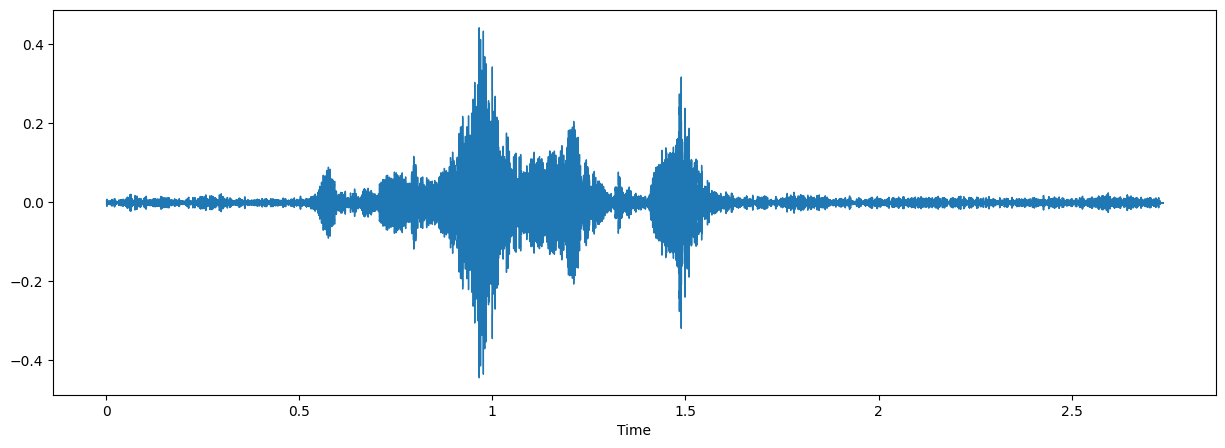

In [ ]:
fname = CREMA + '/' + '1012_IEO_HAP_HI.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

In [ ]:
df = pd.concat([Rav_df, Crema_df], axis = 0)
df.to_csv("Data_path.csv",index=False)
df.head()

,Emotions,Path
0,neutral,/content/drive/My Drive/Rav/Actor_01/03-01-01-...
1,neutral,/content/drive/My Drive/Rav/Actor_01/03-01-02-...
2,happy,/content/drive/My Drive/Rav/Actor_01/03-01-03-...
3,neutral,/content/drive/My Drive/Rav/Actor_01/03-01-02-...
4,neutral,/content/drive/My Drive/Rav/Actor_01/03-01-02-...


In [ ]:
print(df.Emotions.value_counts())

Emotions
happy       1463
sad         1463
angry       1463
disgust     1463
fear        1463
neutral     1375
surprise     192
Name: count, dtype: int64


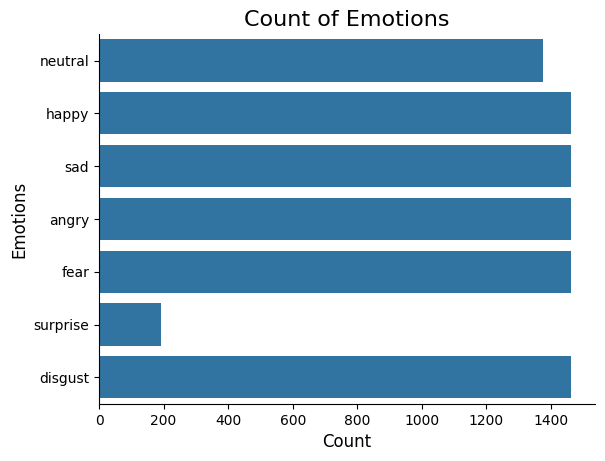

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Emotions', size=16)
sns.countplot(df.Emotions)
plt.xlabel('Count', size=12)
plt.ylabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
data,sr = librosa.load(file_path[0])
sr

22050

In [ ]:
ipd.Audio(data,rate=sr)

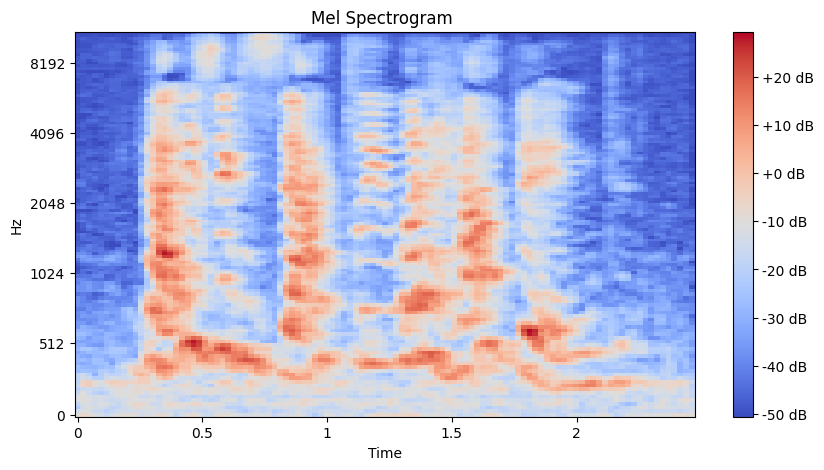

In [ ]:
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

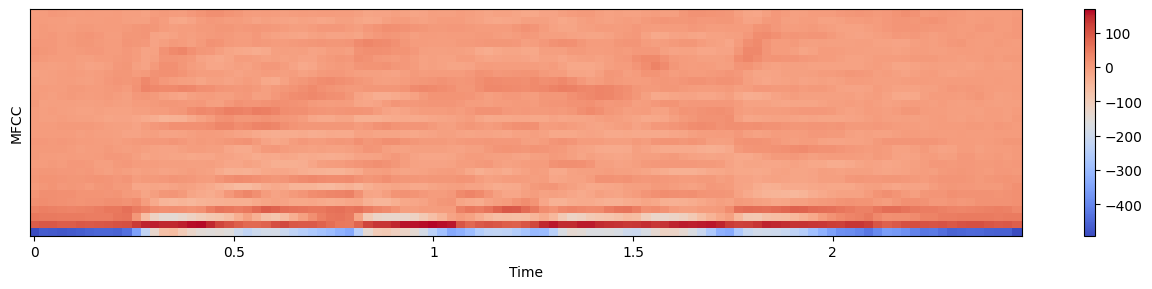

In [ ]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()


DATA AUGMENTATION

In [ ]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    n_steps = pitch_factor * 12
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=n_steps)

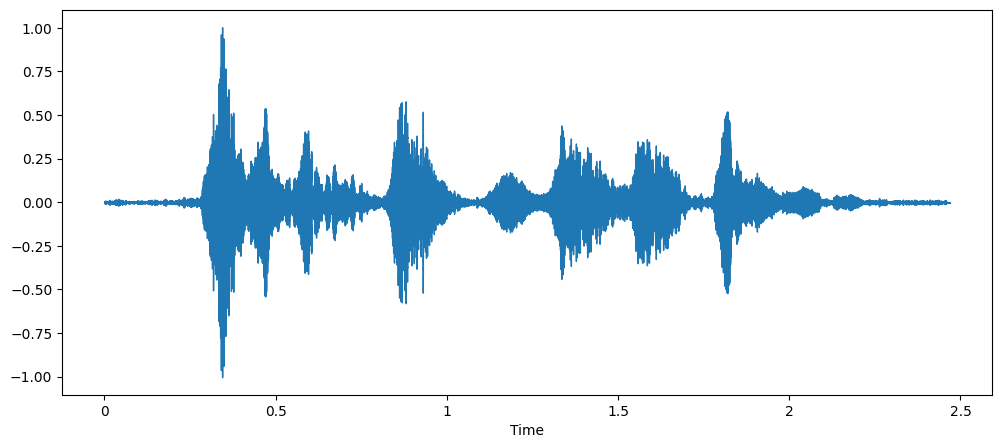

In [ ]:
#Normal Audio
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

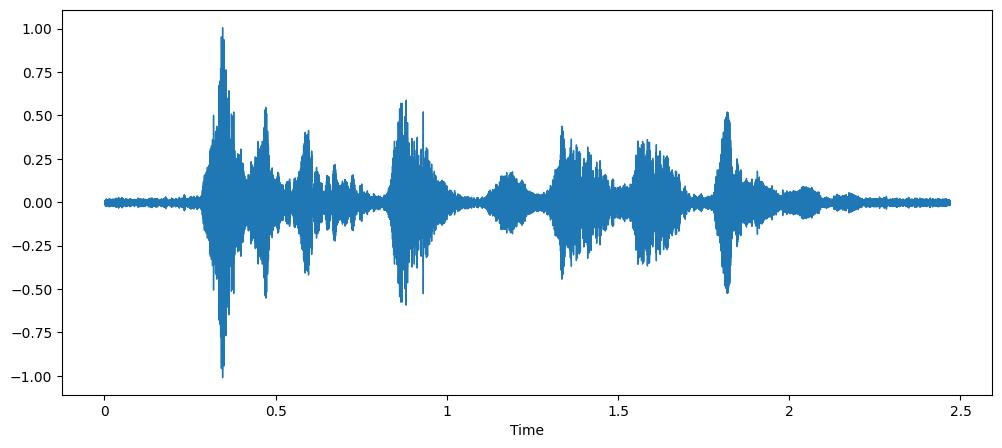

In [ ]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

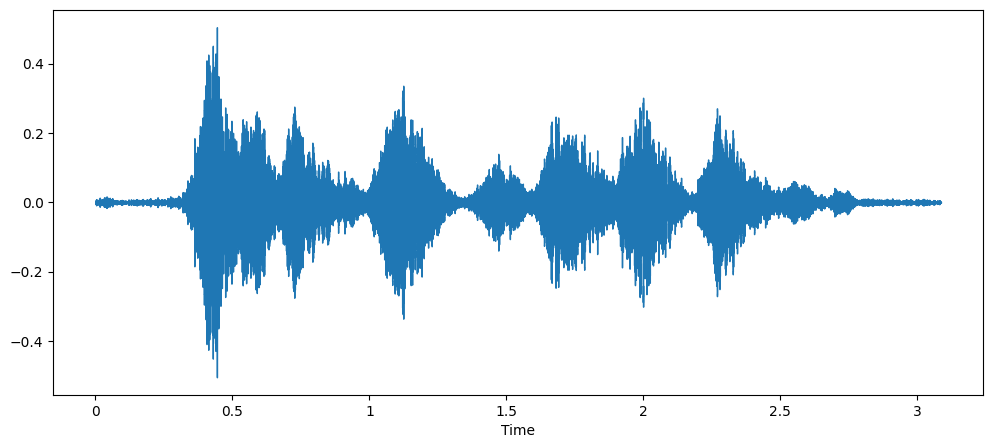

In [ ]:
# STRETCHED AUDIO
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

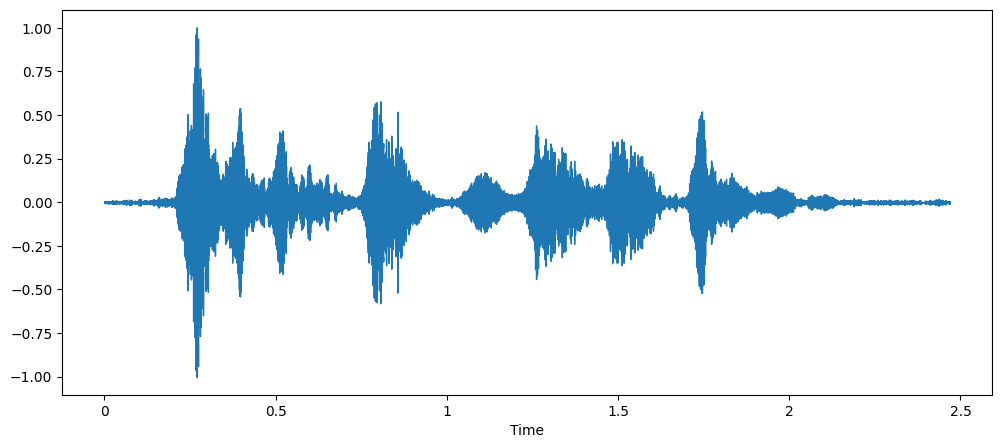

In [ ]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

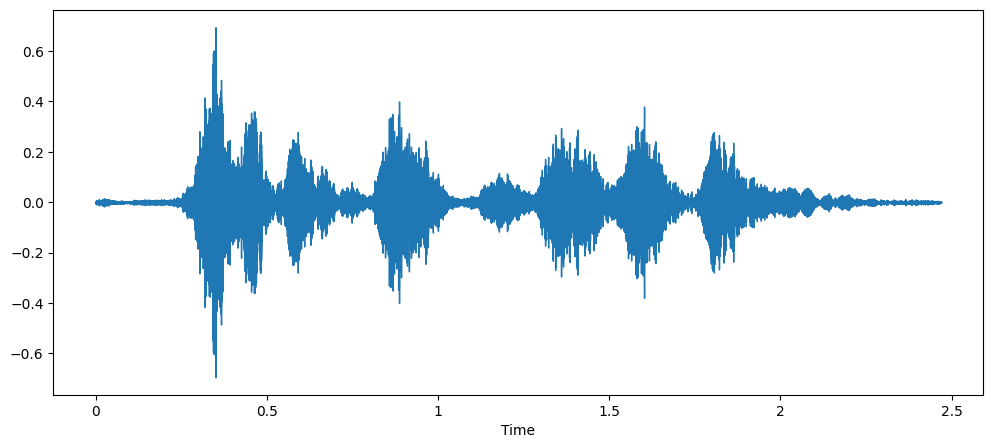

In [ ]:
# AUDIO WITH PITCH
x = pitch(data, sr)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

FEATURE EXTRACTION

In [ ]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
    ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)

    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))

    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))

    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))

    return audio

In [ ]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  2


In [ ]:
import timeit
from tqdm import tqdm
start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(df.Path,df.Emotions,range(df.Path.shape[0]))):
    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start)

1it [00:00,  1.67it/s]

0 audio has been processed


501it [05:37,  1.46it/s]

500 audio has been processed


1001it [11:12,  1.50it/s]

1000 audio has been processed


1501it [16:44,  1.47it/s]

1500 audio has been processed


2001it [21:53,  1.69it/s]

2000 audio has been processed


2501it [27:02,  1.48it/s]

2500 audio has been processed


3001it [32:15,  1.69it/s]

3000 audio has been processed


3501it [37:32,  1.67it/s]

3500 audio has been processed


4001it [42:41,  1.53it/s]

4000 audio has been processed


4501it [47:51,  1.47it/s]

4500 audio has been processed


5001it [53:11,  1.62it/s]

5000 audio has been processed


5501it [58:22,  1.57it/s]

5500 audio has been processed


6001it [1:03:38,  1.58it/s]

6000 audio has been processed


6501it [1:09:00,  1.39it/s]

6500 audio has been processed


7001it [1:14:22,  1.55it/s]

7000 audio has been processed


7501it [1:19:49,  1.38it/s]

7500 audio has been processed


8001it [1:25:17,  1.62it/s]

8000 audio has been processed


8501it [1:30:30,  1.67it/s]

8500 audio has been processed


8882it [1:34:40,  1.56it/s]

Done
Time:  5680.396076054


In [ ]:
len(X), len(Y), df.Path.shape

(35528, 35528, (8882,))

SAVING FEATURES

In [ ]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.173828,0.264648,0.372559,0.486328,0.625488,0.681152,0.720703,0.651855,0.562988,0.559082,...,0.766315,0.755441,0.743671,0.731043,0.717561,0.703260,0.688124,0.672208,0.655518,neutral
1,0.254395,0.382812,0.498535,0.501953,0.499512,0.494141,0.506348,0.500000,0.505371,0.513672,...,-2.598503,0.153040,2.043336,-1.698279,-0.358316,-0.266338,-0.982283,-4.535229,1.113349,neutral
2,0.258301,0.370117,0.489258,0.442383,0.405762,0.347168,0.291992,0.329102,0.452637,0.610840,...,0.167649,0.147130,0.125528,0.102998,0.079710,0.055833,0.031545,0.007023,-0.017549,neutral
3,0.243652,0.365723,0.490723,0.495117,0.497070,0.502441,0.508789,0.511230,0.509766,0.522949,...,-1.007989,-3.142992,-0.610221,-2.634605,2.363121,3.713621,1.884460,1.564797,-1.986733,neutral
4,0.094238,0.278809,0.388184,0.562500,0.643555,0.682617,0.786133,0.817871,0.799316,0.712891,...,-0.337227,-0.393805,-0.262262,0.046055,0.497784,1.010056,1.476799,1.813757,1.973086,neutral


In [ ]:
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.173828,0.264648,0.372559,0.486328,0.625488,0.681152,0.720703,0.651855,0.562988,0.559082,...,0.766315,0.755441,0.743671,0.731043,0.717561,0.703260,0.688124,0.672208,0.655518,neutral
1,0.254395,0.382812,0.498535,0.501953,0.499512,0.494141,0.506348,0.500000,0.505371,0.513672,...,-2.598503,0.153040,2.043336,-1.698279,-0.358316,-0.266338,-0.982283,-4.535229,1.113349,neutral
2,0.258301,0.370117,0.489258,0.442383,0.405762,0.347168,0.291992,0.329102,0.452637,0.610840,...,0.167649,0.147130,0.125528,0.102998,0.079710,0.055833,0.031545,0.007023,-0.017549,neutral
3,0.243652,0.365723,0.490723,0.495117,0.497070,0.502441,0.508789,0.511230,0.509766,0.522949,...,-1.007989,-3.142992,-0.610221,-2.634605,2.363121,3.713621,1.884460,1.564797,-1.986733,neutral
4,0.094238,0.278809,0.388184,0.562500,0.643555,0.682617,0.786133,0.817871,0.799316,0.712891,...,-0.337227,-0.393805,-0.262262,0.046055,0.497784,1.010056,1.476799,1.813757,1.973086,neutral


In [ ]:
print(Emotions.isna().any())

0           False
1           False
2           False
3           False
4           False
            ...  
2372         True
2373         True
2374         True
2375         True
Emotions    False
Length: 2377, dtype: bool


In [ ]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(35528, 2377)

In [ ]:
np.sum(Emotions.isna())

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
0,0
1,0
2,0
3,0
4,0
...,...
2372,0
2373,0
2374,0
2375,0


DATA PREPARATION

In [ ]:
#taking all rows and all cols without last col for X which include features
#taking last col for Y, which include the emotions

X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((28422, 2376), (28422, 7), (7106, 2376), (7106, 7))

In [ ]:
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((28422, 2376), (28422, 7), (7106, 2376), (7106, 7))

In [ ]:
!pip install keras_preprocessing
!pip install tensorflow-text

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.4 MB/s eta 0:00:00


MODEL PREPARATION

In [ ]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('best_model1_weights.keras', monitor='val_accuracy', save_best_only=True)

In [ ]:
early_stop=EarlyStopping(monitor='val_accuracy',mode='max',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [ ]:
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((28422, 2376, 1), (28422, 7), (7106, 2376, 1), (7106, 7))

In [ ]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer

    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer

    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer

    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)                    │ (None, 2376, 512)           │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 2376, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 1188, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 1188, 512)           │       1,311,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 1188, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 594, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 594, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 594, 256)            │         655,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 594, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 297, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 297, 256)            │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 297, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 149, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 149, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 149, 128)            │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 149, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 75, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 75, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9600)                │              

 Total params: 7,193,223 (27.44 MB)

 Trainable params: 7,188,871 (27.42 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [ ]:
history=model.fit(x_traincnn, y_train, epochs=25, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[early_stop,lr_reduction,model_checkpoint])

Epoch 1/25
445/445 ━━━━━━━━━━━━━━━━━━━━ 108s 244ms/step - accuracy: 0.4362 - loss: 1.4228 - val_accuracy: 0.4125 - val_loss: 1.5006 - learning_rate: 0.0010
Epoch 2/25
445/445 ━━━━━━━━━━━━━━━━━━━━ 149s 259ms/step - accuracy: 0.4681 - loss: 1.3337 - val_accuracy: 0.4671 - val_loss: 1.3371 - learning_rate: 0.0010
Epoch 3/25
445/445 ━━━━━━━━━━━━━━━━━━━━ 137s 249ms/step - accuracy: 0.5019 - loss: 1.2541 - val_accuracy: 0.4489 - val_loss: 1.3974 - learning_rate: 0.0010
Epoch 4/25
445/445 ━━━━━━━━━━━━━━━━━━━━ 148s 262ms/step - accuracy: 0.5290 - loss: 1.1937 - val_accuracy: 0.5172 - val_loss: 1.2161 - learning_rate: 0.0010
Epoch 5/25
445/445 ━━━━━━━━━━━━━━━━━━━━ 137s 249ms/step - accuracy: 0.5711 - loss: 1.1044 - val_accuracy: 0.5058 - val_loss: 1.2853 - learning_rate: 0.0010
Epoch 6/25
445/445 ━━━━━━━━━━━━━━━━━━━━ 143s 251ms/step - accuracy: 0.6036 - loss: 1.0158 - val_accuracy: 0.5532 - val_loss: 1.1862 - learning_rate: 0.0010
Epoch 7/25
445/445 ━━━━━━━━━━━━━━━━━━━━ 141s 250ms/step - accura

MODEL EVALUATION

223/223 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.8433 - loss: 0.5301
Accuracy of our model on test data :  84.576416015625 %


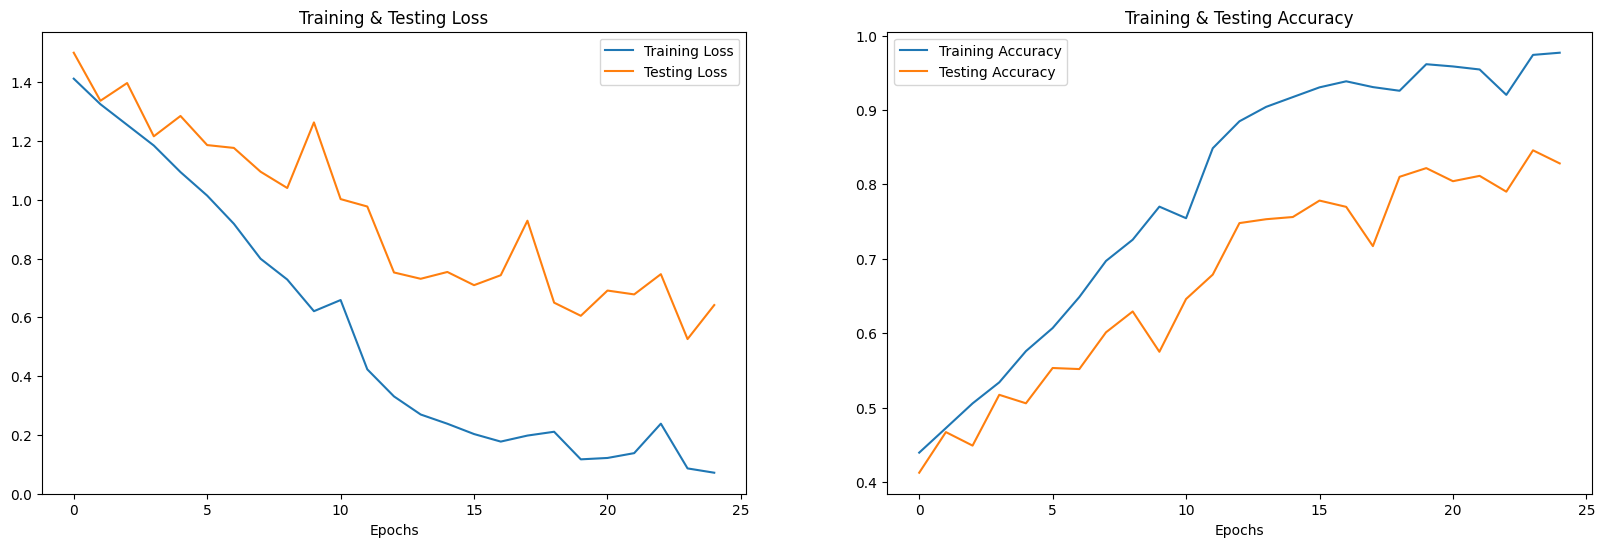

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(len(history.history['loss']))]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

223/223 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step


,Predicted Labels,Actual Labels
0,disgust,disgust
1,angry,angry
2,disgust,disgust
3,fear,fear
4,fear,fear
5,angry,angry
6,disgust,disgust
7,neutral,neutral
8,sad,sad
9,fear,fear


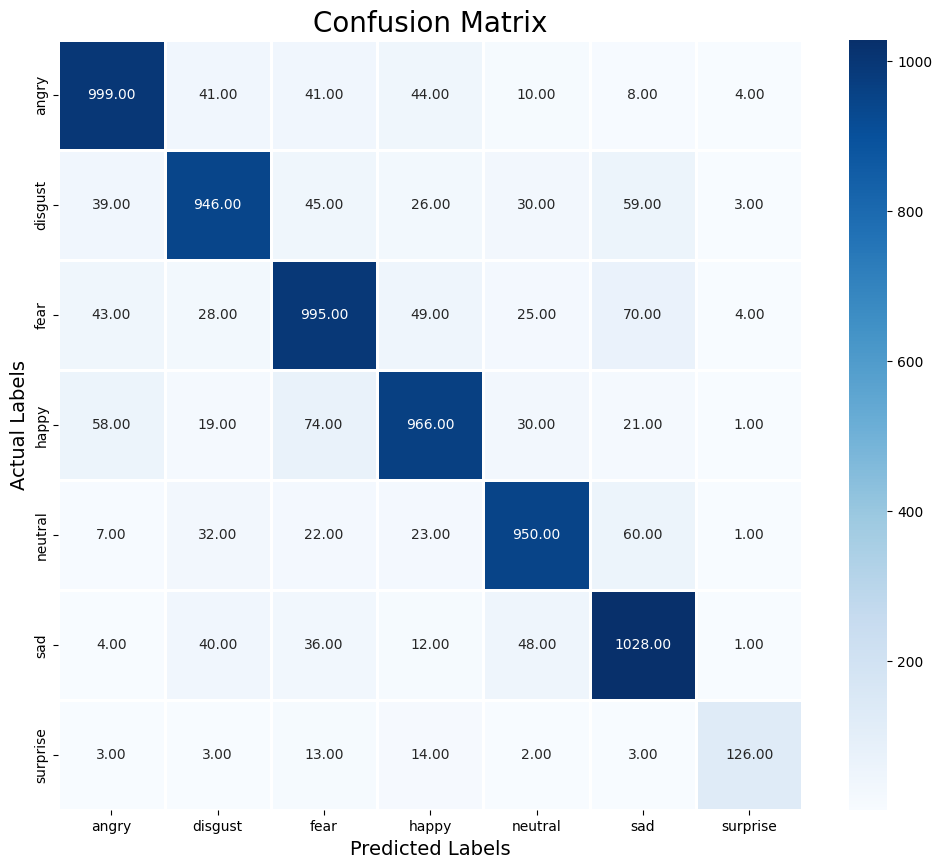

              precision    recall  f1-score   support

       angry       0.87      0.87      0.87      1147
     disgust       0.85      0.82      0.84      1148
        fear       0.81      0.82      0.82      1214
       happy       0.85      0.83      0.84      1169
     neutral       0.87      0.87      0.87      1095
         sad       0.82      0.88      0.85      1169
    surprise       0.90      0.77      0.83       164

    accuracy                           0.85      7106
   macro avg       0.85      0.84      0.84      7106
weighted avg       0.85      0.85      0.85      7106



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

SAVING & LOADING MODEL

In [ ]:
model.save("CNN_model.keras")  # Save as a .keras file
print("Saved model to disk")

# Load the model using `load_model`
loaded_model = tf.keras.models.load_model("CNN_model.keras")  # Load the .keras file
print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
import pickle
import os

os.makedirs('/kaggle/working/', exist_ok=True)

with open('/kaggle/working/scaler2.pickle', 'wb') as f:
    pickle.dump(scaler, f)
with open('/kaggle/working/encoder2.pickle', 'wb') as f:
    pickle.dump(encoder, f)

print("Saved scaler and encoder to disk")


with open('/kaggle/working/scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

with open('/kaggle/working/encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)

print("Done")

Saved scaler and encoder to disk
Done


MAKING PREDICTIONS ON THE DATA

In [ ]:
def get_predict_feat(path):
    d, s_rate= librosa.load(path, duration=2.5, offset=0.6)
    res=extract_features(d)
    result=np.array(res)
    result=np.reshape(result,newshape=(1,2376))
    i_result = scaler2.transform(result)
    final_result=np.expand_dims(i_result, axis=2)

    return final_result

In [ ]:
emotions1={1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust',8:'Surprise'}
def prediction(path1):
    res=get_predict_feat(path1)
    predictions=loaded_model.predict(res)
    y_pred = encoder2.inverse_transform(predictions)
    print(y_pred[0][0])

In [ ]:
audio_path = "/content/drive/My Drive/Rav/Actor_02/03-01-01-01-01-01-02.wav"
prediction(audio_path)
from IPython.display import Audio
Audio(audio_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
neutral
